## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
%matplotlib inline
py.init_notebook_mode(connected=True)

## Data Preparation

### Load Data

In [3]:
data = pd.read_csv('../datasets/creditcard.csv')
data.shape

(284807, 31)

### Data Exploration

In [4]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
print(data.isnull().mean()*100)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Visualization

#### Time-based Transaction Density

In [7]:
class_legit = data.loc[data['Class'] == 0]["Time"]
class_fraud = data.loc[data['Class'] == 1]["Time"]

fig = ff.create_distplot([class_legit, class_fraud], ['Legit Transactions', 'Fraud Transactions'], colors=['#519872', '#041b15'], show_hist=False, show_rug=False)
fig['layout'].update(title='Time-based Transaction Density', xaxis=dict(title='Time'), width=900, height=500)
fig.write_image('../results/visualizations/time_transaction_density.png', scale=2)
pio.show(fig)

#### Data Imbalance

In [8]:
class_val = data['Class'].value_counts()
df = pd.DataFrame({'Class': class_val.index, 'Values': class_val.values})

graph_data = go.Bar(
    x = df['Class'],
    y = df['Values'],
    name = 'Credit Card Data Imbalance',
    marker = dict(color='#519872'),
    text = df['Values']
)

layout = dict(
    title = 'Credit Card Data Imbalance',
    xaxis = dict(title='Class', showticklabels=True),
    yaxis = dict(title='Total Transactions'),
    hovermode = 'closest',
    width = 500
)

fig = go.Figure(data=[graph_data], layout=layout)
fig.write_image('../results/visualizations/credit_card_imbalance.png', scale=2)
pio.show(fig)

#### Transactions Amount

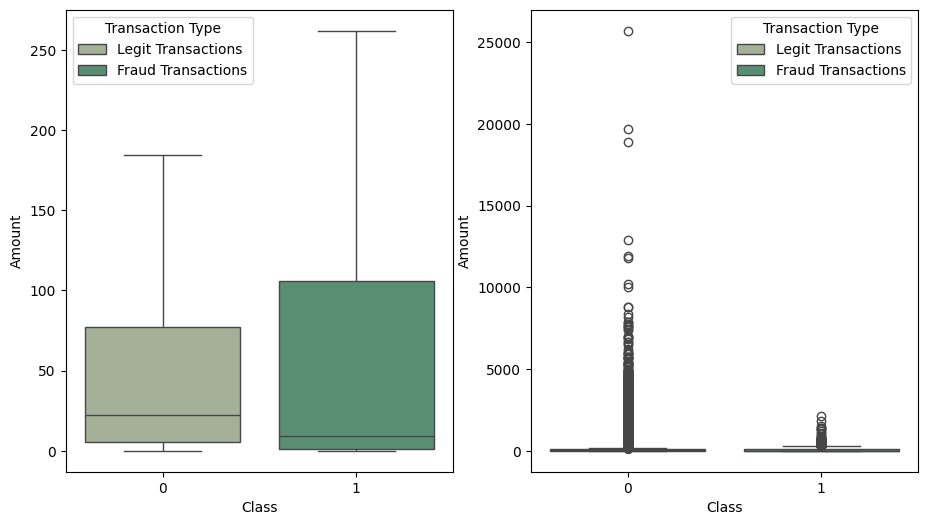

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(11,6))

sns.boxplot(ax=ax[0], x='Class', y='Amount', hue='Class', data=data, palette=['#a4b494', '#519872'], showfliers=False)
sns.boxplot(ax=ax[1], x='Class', y='Amount', hue='Class', data=data, palette=['#a4b494', '#519872'], showfliers=True)

for a in ax:
    handles, _ = a.get_legend_handles_labels()
    a.legend(handles, ['Legit Transactions', 'Fraud Transactions'], title="Transaction Type")

plt.savefig('../results/visualizations/transactions_amount.png', dpi=166.67)
plt.show()

#### Feature Correlation

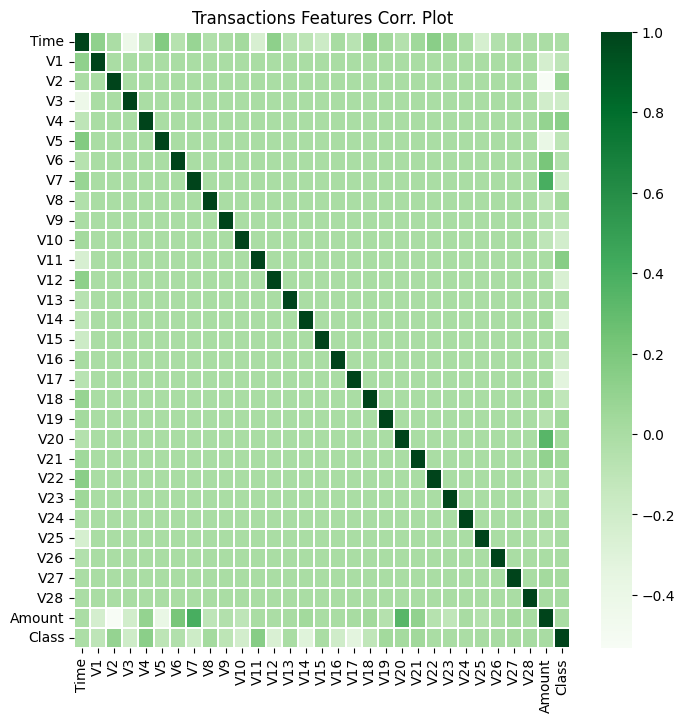

In [10]:
data_corr = data.corr()

plt.figure(figsize=(8,8))
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, cmap='Greens', linewidths=0.1)
plt.title('Transactions Features Corr. Plot')
plt.savefig('../results/visualizations/feature_correlation.png', dpi=125)
plt.show()

### Data Preprocessing

#### Split data into features (X) and target (y)


In [11]:
X = data.drop(['Class'], axis=1)
y = data['Class']

### Train-Test Split

Training set - 80%,
Test set - 20%

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Oversampling using SMOTE

In [13]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#### Data Scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

### Define Models

In [15]:
models = {
    'Logistic_Regression': LogisticRegression(random_state=42, max_iter=500),
    'Decision_Tree_Classifier': DecisionTreeClassifier(max_depth=15, max_features='sqrt', random_state=42)
}

for name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f'Model: {name} ——> Cross Validation Score: {np.mean(cv_score):.2f}')

Model: Logistic_Regression ——> Cross Validation Score: 0.98
Model: Decision_Tree_Classifier ——> Cross Validation Score: 1.00


### DecisionTreeClassifier (highest Cross-Val Score)

In [16]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation

In [17]:
y_pred = dtc.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
print(f'Decision Tree Classifier\'s Accuracy Score: {acc_score:.3f}')

Decision Tree Classifier's Accuracy Score: 0.998


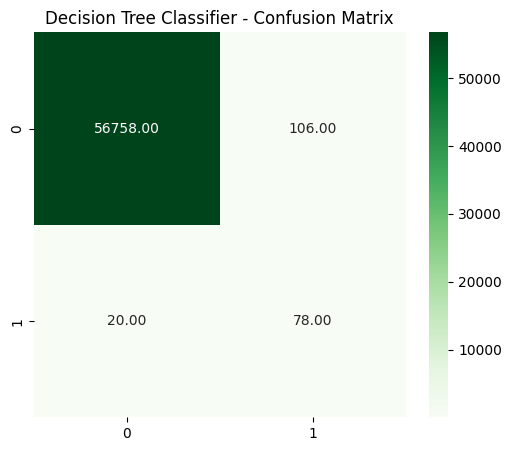

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.savefig('../results/visualizations/dtc_conf_matrix.png', dpi=100)
plt.show()